# Executive Summary
Main finding and solutions are :

There are 4 segment

Cluster 1 : Economy ** The electric bicycles company should present to cluster 1 a cargo bike with a small basket suitable for the small chores to be done in the city and they should advertise their entry level product mostly on Instagram.

Cluster 2 : Premium ** The ad strategy for Premium should focus on Convenience, Environment and Climate change and Saving time.

Cluster 3 : Standard ** The electric bicycles company should present cluster 3 with a city bike that these individuals can ride to navigate around the city as well as use it as a form of exercise.To enter this specific market, we would advise the company to advertise through Instagram.

Cluster 4 : Eco-Friendly ** Advertising strategy for Eco-Friendly should be focused on traditional offline channels, such as organic supermarkets.Preferred online channel,I recommend using Instagram as a first choice.

Here is my analysis method:

First of all, I used exploratory data analysis to understand the data we need to analyze.

Second, I use Elbow analysis to find an optimal cluster range.

Then, I compare the difference between 4 and 5 Cluster.

Finally, I analyzed in more depth by correlating Cluster with demographic information.



In [52]:
library(dplyr)
library(purrr)
library(ggplot2)
library(cluster)
library(ggcorrplot)
library(ggplotify)
library(ggpubr)
library(corrplot)
library(tidyverse)
library(factoextra)

In [53]:
# Load the case dataset
da_cba = read.csv(file = "cargobike_attitudes.csv", header= TRUE)
da_cbaq = read.csv(file = "cargobike_questions.csv", header = FALSE)
Att_Questions = da_cba[, 1:26]
da_cbaq =da_cbaq[-1,]

In [10]:
summary(da_cba)

       Q1              Q2             Q3              Q4              Q5       
 Min.   :1.000   Min.   :1.00   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:2.00   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:2.000  
 Median :3.000   Median :3.00   Median :2.000   Median :2.000   Median :4.000  
 Mean   :2.862   Mean   :3.09   Mean   :2.675   Mean   :2.458   Mean   :3.397  
 3rd Qu.:4.000   3rd Qu.:5.00   3rd Qu.:4.000   3rd Qu.:3.000   3rd Qu.:5.000  
 Max.   :5.000   Max.   :5.00   Max.   :5.000   Max.   :5.000   Max.   :5.000  
       Q6              Q7              Q8              Q9            Q10       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.00   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:1.00   1st Qu.:1.000  
 Median :4.000   Median :2.000   Median :3.000   Median :2.00   Median :2.000  
 Mean   :3.433   Mean   :2.672   Mean   :3.197   Mean   :2.23   Mean   :2.777  
 3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.

In [11]:
str(da_cba)

'data.frame':	400 obs. of  32 variables:
 $ Q1       : int  3 2 2 4 4 2 3 1 3 1 ...
 $ Q2       : int  2 4 3 2 1 5 1 5 2 4 ...
 $ Q3       : int  5 3 5 1 1 4 4 2 2 1 ...
 $ Q4       : int  3 4 1 1 3 4 2 3 5 3 ...
 $ Q5       : int  5 2 5 2 2 3 4 2 2 2 ...
 $ Q6       : int  5 2 5 4 4 3 4 2 1 2 ...
 $ Q7       : int  5 2 5 2 2 3 5 1 1 2 ...
 $ Q8       : int  5 4 3 2 1 3 4 4 1 3 ...
 $ Q9       : int  3 1 1 2 3 1 2 1 1 1 ...
 $ Q10      : int  1 1 1 5 5 2 1 1 1 1 ...
 $ Q11      : int  2 4 1 4 3 5 1 5 3 5 ...
 $ Q12      : int  5 3 5 1 2 3 4 2 3 2 ...
 $ Q13      : int  1 3 2 2 3 4 3 2 5 4 ...
 $ Q14      : int  2 1 3 4 5 1 3 1 1 1 ...
 $ Q15      : int  1 1 1 3 1 3 1 1 2 3 ...
 $ Q16      : int  4 3 3 5 5 3 4 3 4 3 ...
 $ Q17      : int  4 4 4 3 3 4 3 3 1 3 ...
 $ Q18      : int  3 4 2 1 3 4 2 4 2 3 ...
 $ Q19      : int  5 1 3 4 4 1 2 1 3 3 ...
 $ Q20      : int  5 3 5 2 1 5 4 3 2 2 ...
 $ Q21      : int  1 5 1 4 4 4 1 4 4 4 ...
 $ Q22      : int  2 5 2 2 3 5 2 5 4 5 ...
 $ Q23      :

In [15]:
head(Att_Questions)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,⋯,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,3,2,5,3,5,5,5,5,3,1,⋯,4,3,5,5,1,2,4,3,5,2
2,2,4,3,4,2,2,2,4,1,1,⋯,4,4,1,3,5,5,4,5,2,5
3,2,3,5,1,5,5,5,3,1,1,⋯,4,2,3,5,1,2,4,2,4,1
4,4,2,1,1,2,4,2,2,2,5,⋯,3,1,4,2,4,2,1,3,3,4
5,4,1,1,3,2,4,2,1,3,5,⋯,3,3,4,1,4,3,3,3,5,4
6,2,5,4,4,3,3,3,3,1,2,⋯,4,4,1,5,4,5,5,5,4,5


In [58]:
da_cbaq

[1] "I want to be part of the future today"                       
 [2] "I like to spend time outdoors"                               
 [3] "A car has many hidden costs"                                 
 [4] "I want to leave a better world for my children"              
 [5] "Bicycles are freedom"                                        
 [6] "Parking a car in the city is increasingly difficult"         
 [7] "City traffic is only getting worse"                          
 [8] "Cars should be taxed higher"                                 
 [9] "I do not have time to go to the gym"                         
[10] "I like to try new things"                                    
[11] "I try to buy products with no packages"                      
[12] "I could never afford a second car"                           
[13] "The best way to teach your children is by example"           
[14] "Living completely without a car is unthinkable"              
[15] "Cars pose a danger to pedestrians and cyclists"              
[16] "Many of my friends have cargo bikes"                         
[17] "Bicycles are the a convenient way to run errands in the city"
[18] "I would like to have more time to volunteer"                 
[19] "Bicycles are only useful in cities"                          
[20] "More streets downtown should be pedentrianized"              
[21] "We only buy organic food"                                    
[22] "We need to be more in touch with nature"                     
[23] "Public transport is central to the future of mobility"       
[24] "We need drastic measures to protect the environment"         
[25] "Every moment is an opportunity to exercise"                  
[26] "It is worth paying more for renewable energy"

# **Exploratory data analysis**

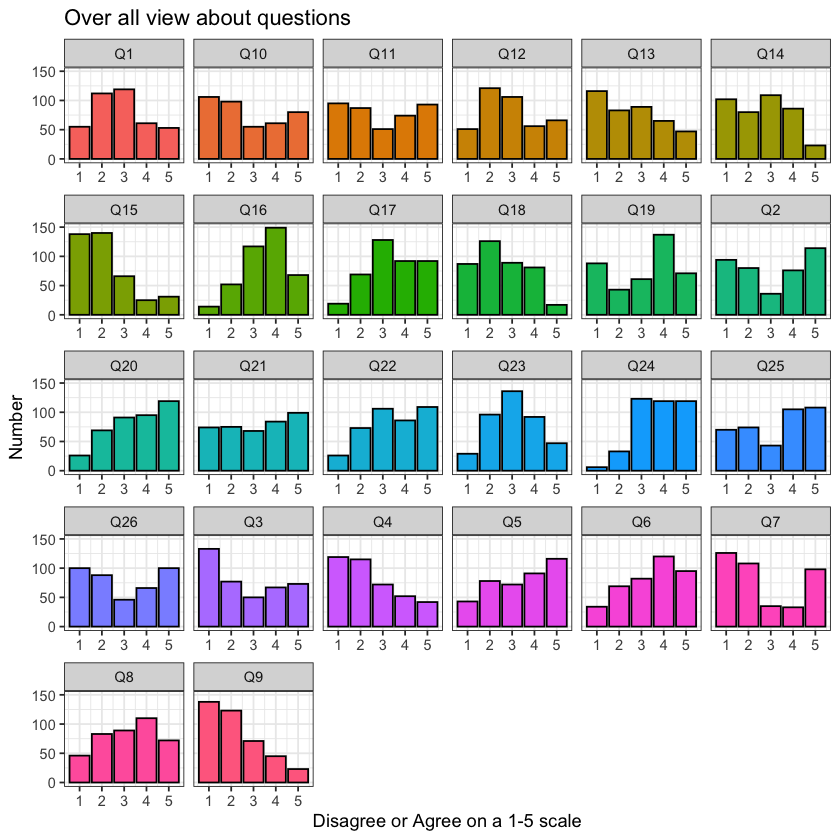

In [29]:
# Bar Chart for Q1-Q26
da_cba %>%
  gather(Attributes, value, 1:26) %>%
  ggplot(aes(x=value, fill=Attributes)) +
  geom_bar(colour="black", show.legend=FALSE) +
  facet_wrap(~Attributes, scales="free_x") +
  labs(x="Disagree or Agree on a 1-5 scale", y="Number",
       title= "Over all view about questions") +
  theme_bw()

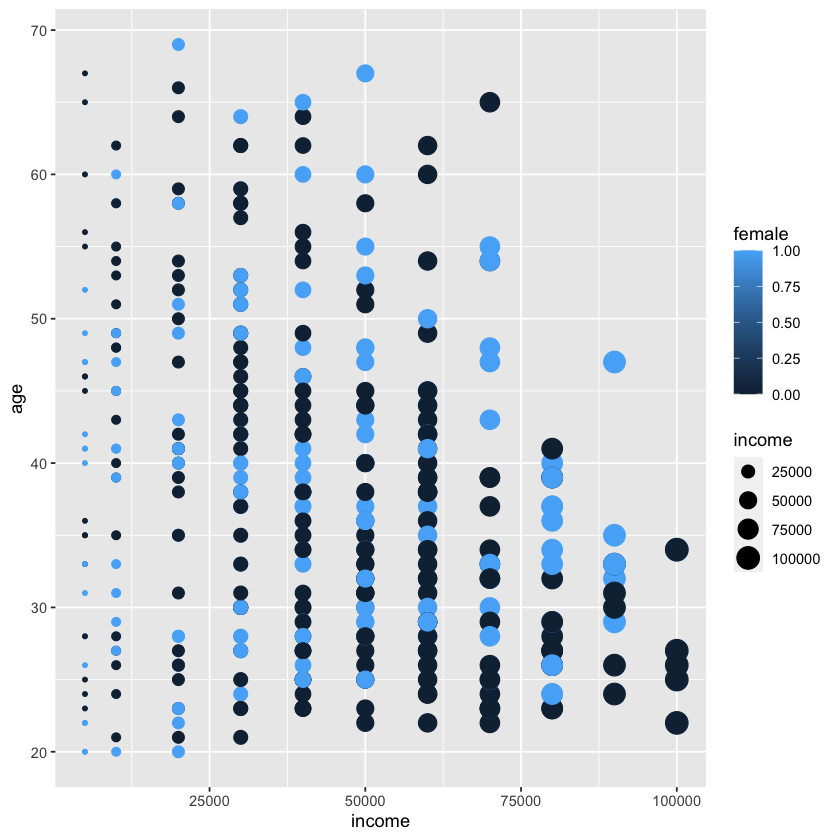

In [30]:
# Demographic Scatter Chart
ggplot(da_cba,aes(x = income,y = age,color = female,size = income)) +geom_point() 

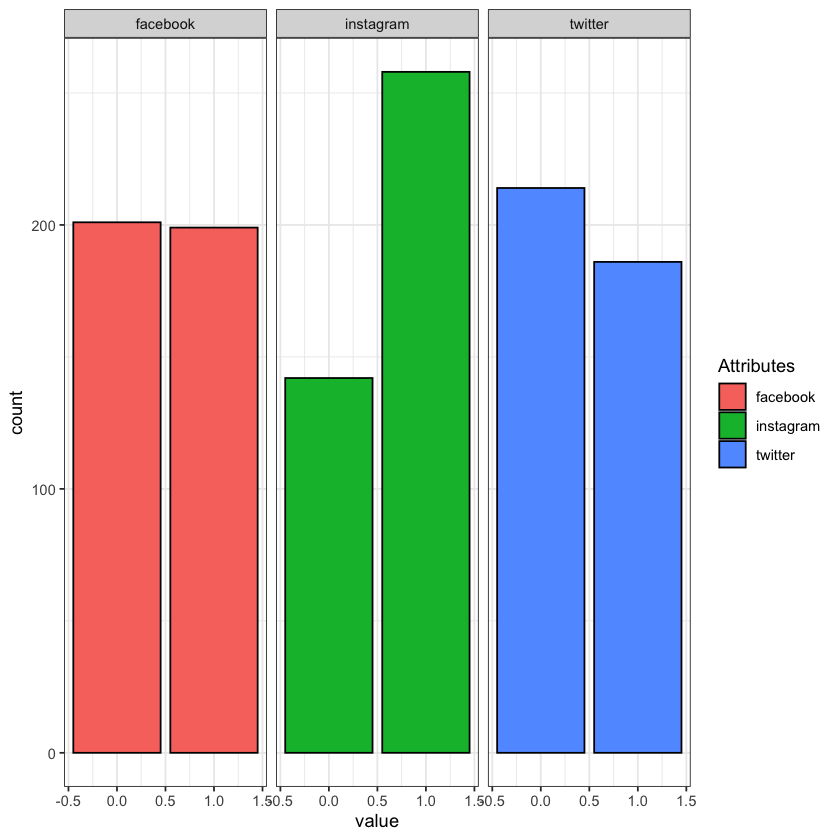

In [31]:
# Social Media Comparison
da_cba %>%
  gather(Attributes, value, 30:32) %>%
  ggplot(aes(x=value, fill=Attributes)) +
  geom_bar(colour="black") +
  facet_wrap(~Attributes) +
  theme_bw()

# Cluster Analysis
## Determining the best number of clusters

In [32]:
# Using Elbow plot 
tot_withinss <- map_dbl(1:10,function(k){
  model <- kmeans(x = Att_Questions,   
                        centers = k,      
                        nstart = 100,     
                        iter.max = 300)
  model$tot.withinss
})
elbow_df <- data.frame(
  k = 1:10,
  tot_withinss = tot_withinss
)


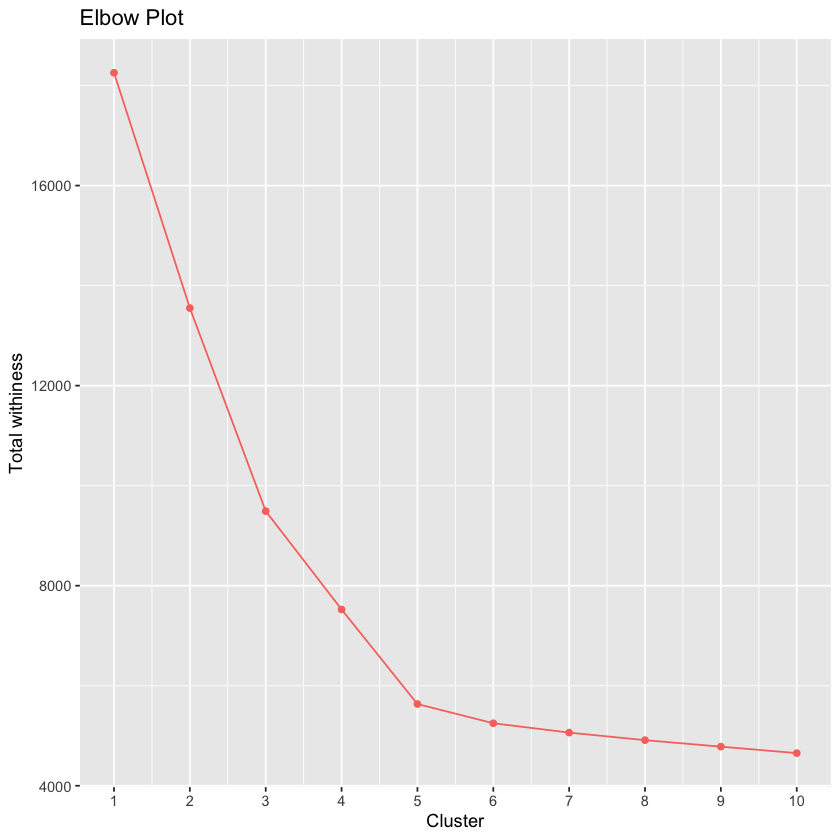

In [33]:
#Generate a graph of Total withiness from 1-10
ggplot(elbow_df, aes(x = k, y = tot_withinss)) +
  geom_line(col = "#F8766D") +
  geom_point(col = "#F8766D") +
  scale_x_continuous(breaks = 1:10) +
  labs(x = "Cluster",y = "Total withiness", title = "Elbow Plot")

#Because after 4-5, the line becomes significantly smoother. So 4 or 5 is probably the more appropriate cluster.

## Comparison 4 vs 5 Clusters

In [34]:
kmeans_cba_4seg = kmeans(Att_Questions,   
                        centers = 4,      
                        nstart = 100,     
                        iter.max = 300)   
kmeans_cba_5seg = kmeans(Att_Questions,   
                        centers = 5,      
                        nstart = 100,     
                        iter.max = 300)  

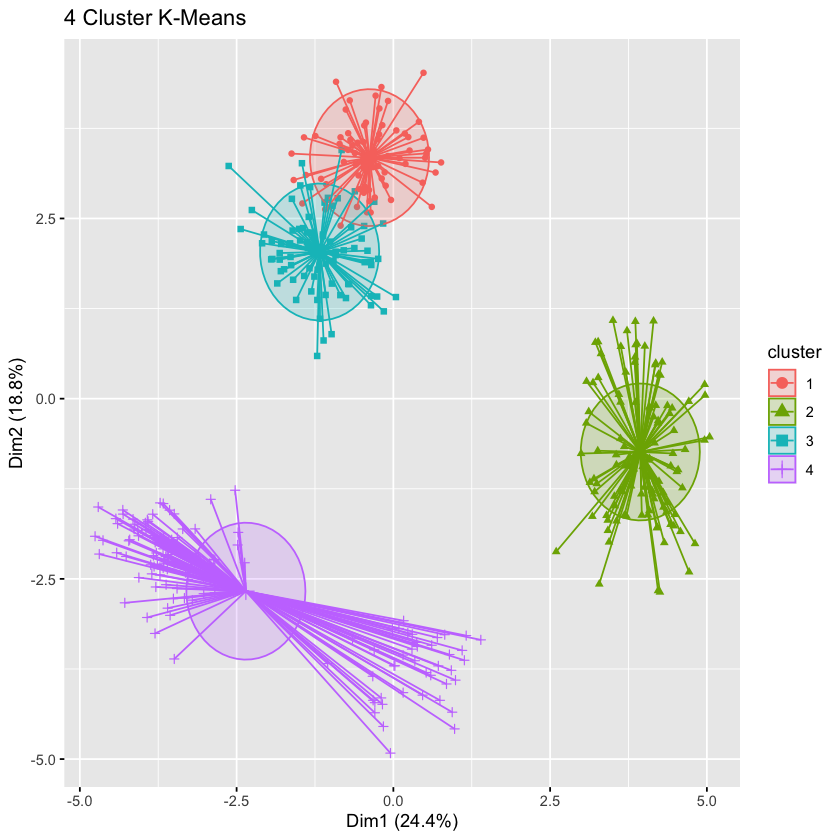

In [38]:
fviz_cluster(object = kmeans_cba_4seg,
               data = da_cba,
               show.clust.cent = TRUE,
               ellipse.type = "euclid",
               star.plot = TRUE,
               labelsize = 0) +
  labs(title = "4 Cluster K-Means")

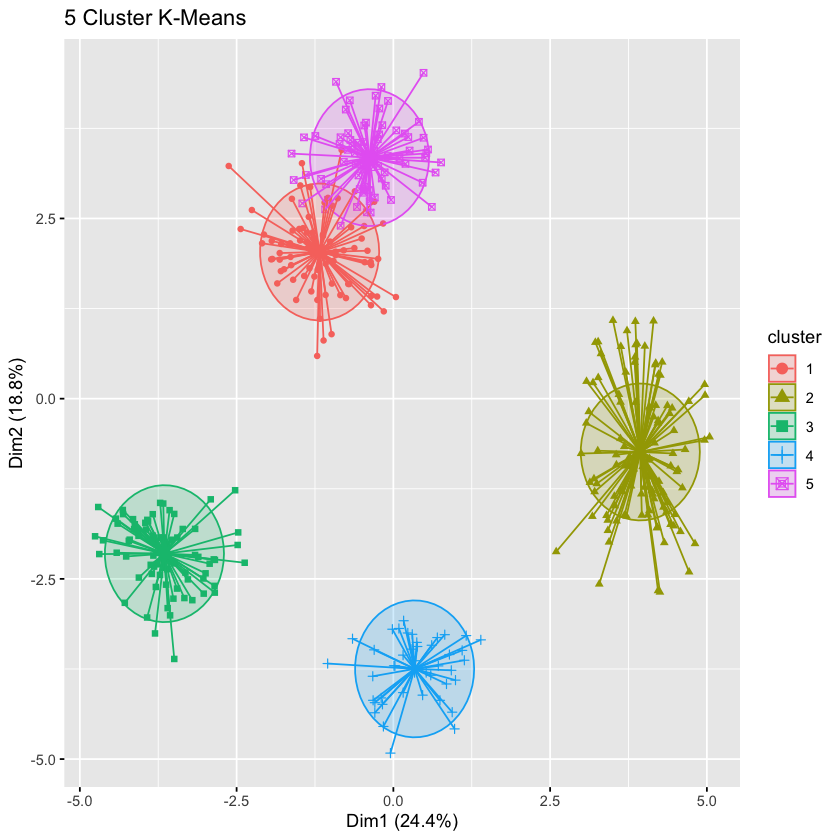

In [40]:
fviz_cluster(object = kmeans_cba_5seg,
               data = da_cba,
               show.clust.cent = TRUE,
               ellipse.type = "euclid",
               star.plot = TRUE,
               labelsize = 0)+
  labs(title = "5 Cluster K-Means")

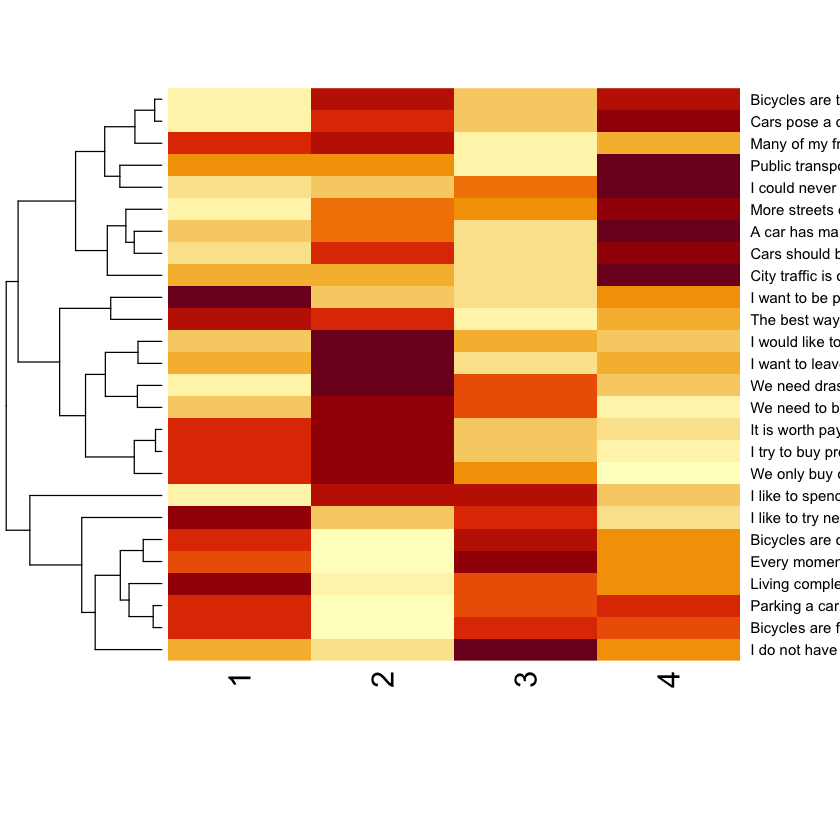

In [41]:
heatmap(t(scale(kmeans_cba_4seg$centers, scale = FALSE)), Colv = NA,
        labRow = da_cbaq)

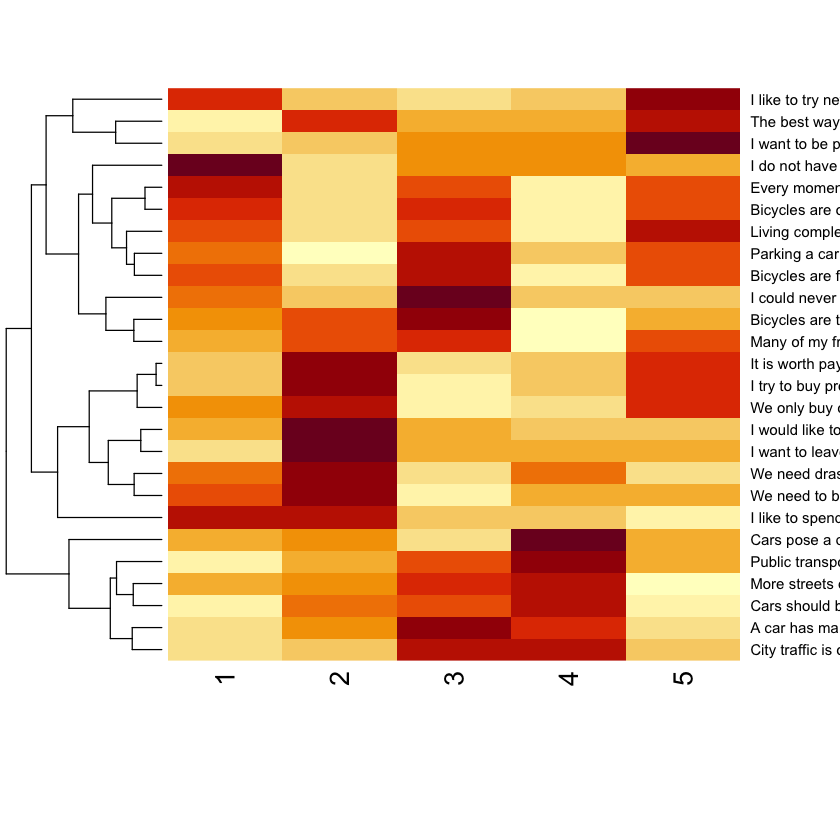

In [42]:
heatmap(t(scale(kmeans_cba_5seg$centers, scale = FALSE)), Colv = NA,
        labRow = da_cbaq)

## Compare demographical date in different Clusters

In [56]:
# Number of people in Cluster 4
table(kmeans_cba_4seg$cluster)


  1   2   3   4 
 75 110  86 129 

In [57]:
# Number of people in Cluster 5
table(kmeans_cba_5seg$cluster)


  1   2   3   4   5 
 86 110  87  42  75 

In [45]:
da_cba$cluster = kmeans_cba_4seg$cluster # creates a new variable
da_cba$cluster_5seg = kmeans_cba_5seg$cluster # creates a new variable
da_cba[da_cba$cluster == "2", ]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,⋯,Q25,Q26,age,female,income,facebook,instagram,twitter,cluster,cluster_5seg
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
2,2,4,3,4,2,2,2,4,1,1,⋯,2,5,26,0,20000,1,0,0,2,2
6,2,5,4,4,3,3,3,3,1,2,⋯,4,5,37,1,50000,1,1,1,2,2
8,1,5,2,3,2,2,1,4,1,1,⋯,1,5,46,1,40000,1,1,1,2,2
9,3,2,2,5,2,1,1,1,1,1,⋯,1,3,29,1,50000,0,0,1,2,2
10,1,4,1,3,2,2,2,3,1,1,⋯,1,5,38,1,60000,0,0,1,2,2
15,1,4,2,3,2,2,2,3,1,1,⋯,1,4,58,0,50000,0,0,1,2,2
16,2,4,2,4,2,1,1,1,1,1,⋯,1,3,28,0,40000,1,0,0,2,2
24,4,5,2,5,3,1,2,2,1,2,⋯,1,5,35,0,5000,0,1,1,2,2
38,1,5,1,5,1,2,1,3,1,2,⋯,2,5,59,1,30000,1,1,0,2,2


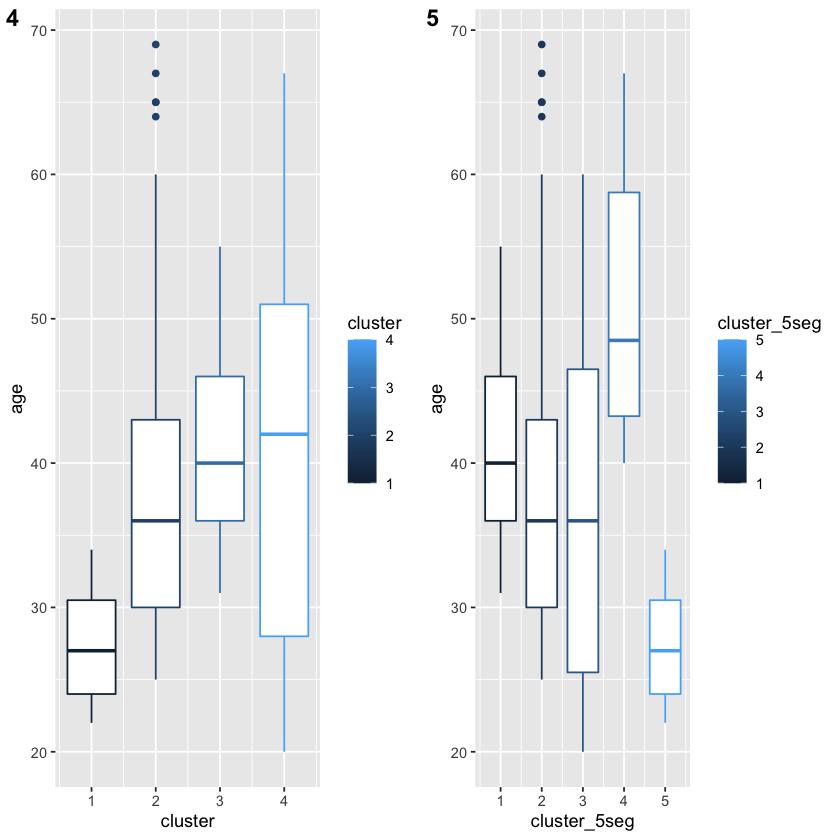

In [46]:
# Cluster 4 & 5 VS Age
q1 <- ggplot(da_cba,aes(x = cluster,y = age, group= cluster, color = cluster)) +geom_boxplot()
q1_5seg <- ggplot(da_cba,aes(x = cluster_5seg,y = age, group= cluster_5seg, color = cluster_5seg)) +geom_boxplot()
ggarrange(q1, q1_5seg, widths = c(2,2), labels = c('4', '5'))

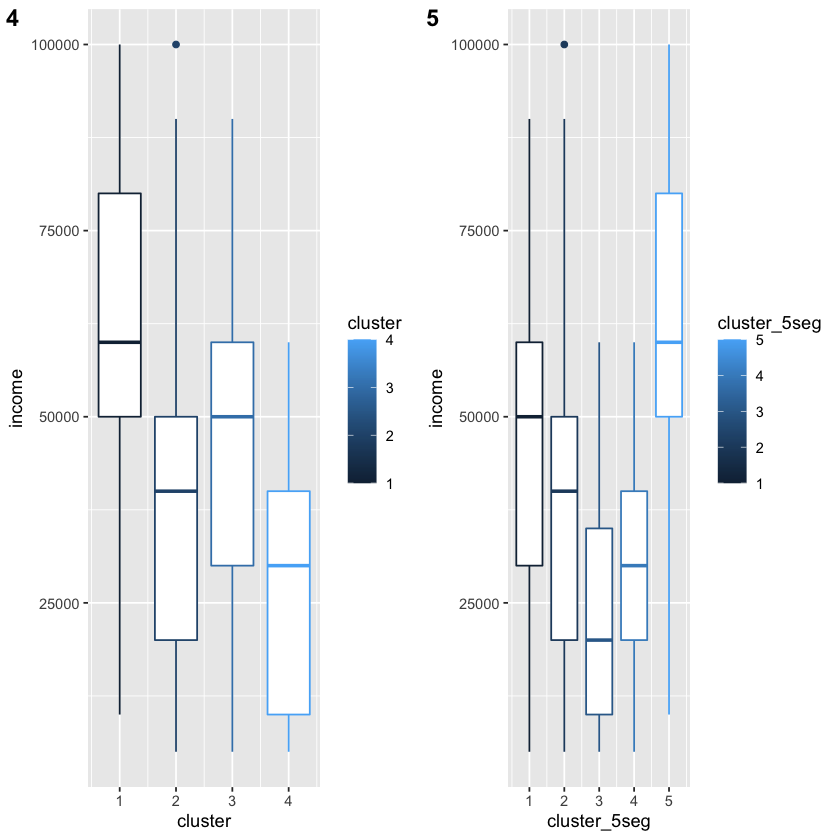

In [47]:
# Cluster 4 & 5 VS Income
q2<- ggplot(da_cba,aes(x = cluster,y = income, group= cluster, color = cluster)) +geom_boxplot()
q2_5seg <- ggplot(da_cba,aes(x = cluster_5seg,y = income, group= cluster_5seg, color = cluster_5seg)) +geom_boxplot()
ggarrange(q2, q2_5seg, widths = c(2,2), labels = c('4', '5'))

# Explore Cluster analysis results base on 4 cluster

In [48]:
# Cluster vs Mean(Demographics)
NQ_da_cba <- da_cba %>%
  select(age:cluster) %>%
  group_by(cluster) %>%
  summarise_all(list(mean))
NQ_da_cba

cluster,age,female,income,facebook,instagram,twitter
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,27.36000,0.1866667,64133.33,0.3866667,0.8000000,0.7200000
2,38.50909,0.6636364,40454.55,0.4000000,0.5000000,0.4454545
3,41.27907,0.3604651,48546.51,0.6744186,0.7441860,0.4302326
4,41.00000,0.3333333,24922.48,0.5271318,0.6124031,0.3565891


In [49]:
# Social Media Mean(Questions & Demographics)
NQ2_da_cba <- da_cba %>%
  select(age:twitter)
NQ2_da_cba  %>% group_by(facebook) %>% summarise_all(list(mean))
NQ2_da_cba  %>% group_by(instagram) %>% summarise_all(list(mean))
NQ2_da_cba %>% group_by(twitter) %>% summarise_all(list(mean))

facebook,age,female,income,instagram,twitter
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,35.93532,0.4577114,41915.42,0.6666667,0.4676617
1,39.71859,0.3467337,41331.66,0.6231156,0.4623116


instagram,age,female,income,facebook,twitter
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,39.55634,0.3943662,39753.52,0.5281690,0.3943662
1,36.86047,0.4069767,42655.04,0.4806202,0.5038760


twitter,age,female,income,facebook,instagram
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,38.68692,0.3831776,38411.21,0.5000000,0.5981308
1,36.81720,0.4247312,45322.58,0.4946237,0.6989247


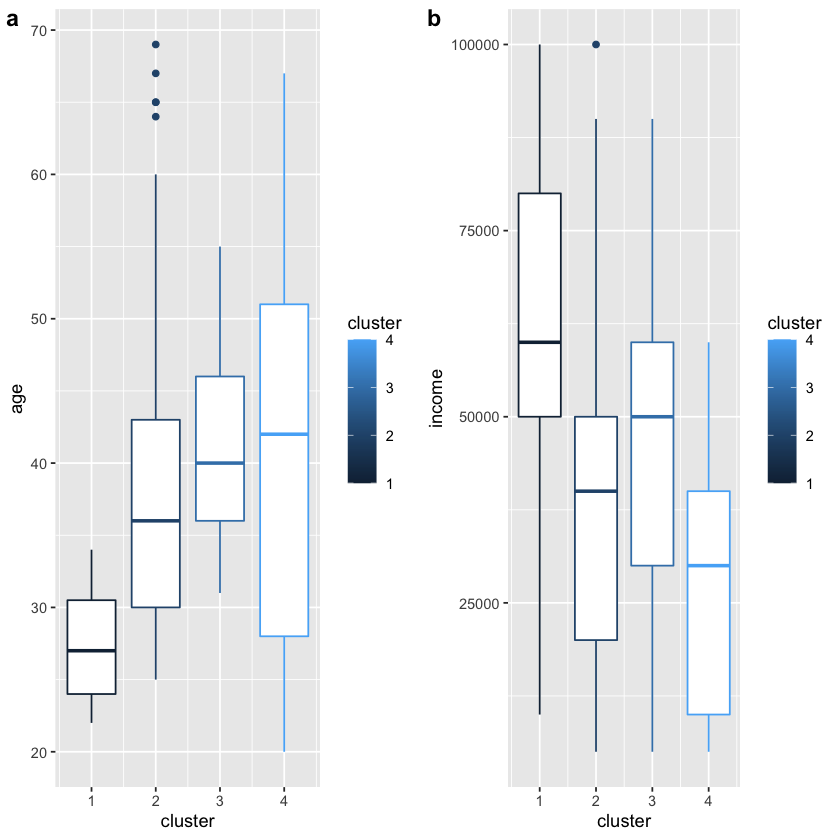

In [50]:
# Compare Clusters VS Age & Income
q1 <- ggplot(da_cba,aes(x = cluster,y = age, group= cluster, color = cluster)) +geom_boxplot()
q2<- ggplot(da_cba,aes(x = cluster,y = income, group= cluster, color = cluster)) +geom_boxplot()
ggarrange(q1, q2, widths = c(2,2), labels = c('a', 'b'))

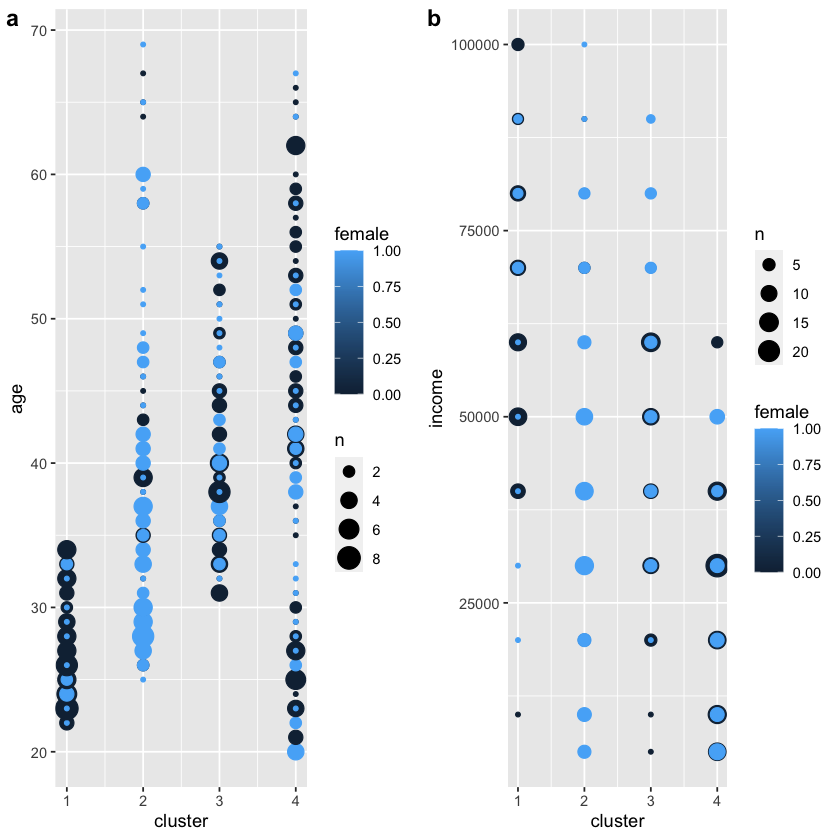

In [51]:
# Compare Clusters VS Age & Income by gender
e1 <- ggplot(da_cba,aes(x = cluster,y = age, group= cluster, color = female)) +geom_count()
e2 <- ggplot(da_cba,aes(x = cluster,y = income, group= cluster, color = female)) +geom_count()
ggarrange(e1, e2, widths = c(2,2), labels = c('a', 'b'))